In [1]:
# Import the required libraries.
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
from keras.models import load_model
from moviepy.editor import *
%matplotlib inline
 
from sklearn.model_selection import train_test_split
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [2]:
print("Loading model ...")
Violence_model = load_model('violence-detection.h5')
print('Success')
print(Violence_model)

Loading model ...
Success


In [4]:
SEQUENCE_LENGTH = 16
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
CLASSES_LIST = ["Non Violence", "Violence"]

In [5]:
def predict_frames(video_file_path, output_file_path, SEQUENCE_LENGTH):
    
    # Read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)
 
    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # VideoWriter to store the output video in the disk.
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), 
                                    video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
 
    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)
 
    # Store the predicted class in the video.
    predicted_class_name = ''
 
    # Iterate until the video is accessed successfully.
    while video_reader.isOpened():
 
        ok, frame = video_reader.read() 
        
        if not ok:
            break
 
        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame 
        normalized_frame = resized_frame / 255
 
        # Appending the pre-processed frame into the frames list.
        frames_queue.append(normalized_frame)
 
        # We Need at Least number of SEQUENCE_LENGTH Frames to perform a prediction.
        # Check if the number of frames in the queue are equal to the fixed sequence length.
        if len(frames_queue) == SEQUENCE_LENGTH:                        
 
            # Pass the normalized frames to the model and get the predicted probabilities.
            predicted_labels_probabilities = Violence_model.predict(np.expand_dims(frames_queue, axis = 0))[0]
 
            # Get the index of class with highest probability.
            predicted_label = np.argmax(predicted_labels_probabilities)
 
            # Get the class name using the retrieved index.
            predicted_class_name = CLASSES_LIST[predicted_label]
            print(predicted_class_name)
 
        # Write predicted class name on top of the frame.
        cv2.putText(frame, predicted_class_name, (5, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 3)
         
        # Write The frame into the disk using the VideoWriter
        video_writer.write(frame)                       
        
    video_reader.release()
    video_writer.release()

In [6]:
plt.style.use("default")

# To show Random Frames from the saved output predicted video (output predicted video doesn't show on the notebook but can be downloaded)
def show_pred_frames(pred_video_path): 

    plt.figure(figsize=(20,15))

    video_reader = cv2.VideoCapture(pred_video_path)

    # Get the number of frames in the video.
    frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    print(frames_count)
    if frames_count <= SEQUENCE_LENGTH:
        print("Video is too short for this sequence length")
        return
    # Make sure the sampling range is not negative or larger than the population.
    max_index = frames_count - 1
    start_index = min(max(SEQUENCE_LENGTH, 0), max_index)
    
    # Get Random Frames from the video then Sort it
    random_range = sorted(random.sample(range (SEQUENCE_LENGTH , frames_count ), 5))
        
    for counter, random_index in enumerate(random_range, 1):
        
        plt.subplot(5, 4, counter)

        # Set the current frame position of the video.  
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, random_index)
          
        ok, frame = video_reader.read() 

        if not ok:
            break 

        frame = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)

        plt.imshow(frame);
        plt.gcf().set_size_inches(20,20);
        plt.tight_layout()
                            
    video_reader.release()

In [27]:
test_videos_directory = 'violence_test_videos'
os.makedirs(test_videos_directory, exist_ok = True)
 
# Get the input video path.
input_video_file_path = r'F:\DSGP\Violence Detection\Prediction\3.mp4'

# Display the output video.
VideoFileClip(input_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [28]:
# Construct the output video path.
output_video_file_path = f'{test_videos_directory}/Output.mp4'
 
# Perform Action Recognition on the Test Video.
predict_frames(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 16ms/step
Non Violence
1/1 [==============================] - 0s 26ms/step
Non Violence
1/1 [==============================] - 0s 22ms/step
Non Violence
1/1 [==============================] - 0s 26ms/step
Non Violence
1/1 [==============================] - 0s 26ms/step
Non Violence
1/1 [==============================] - 0s 26ms/step
Non Violence
1/1 [==============================] - 0s 22ms/step
Non Violence
1/1 [==============================] - 0s 26ms/step
Non Violence
1/1 [==============================] - 0s 24ms/step
Non Violence
1/1 [==============================] - 0s 27ms/step
Non Violence
1/1 [==============================] - 0s 26ms/step
Non Violence
1/1 [==============================] - 0s 26ms/step
Non Violence
1/1 [==============================] - 0s 25ms/step
Non Violence
1/1 [==============================] - 0s 20ms/step
Non Violence
1/1 [==============================] - 0s 23ms/step
Non Violence
1/1 [====================

In [29]:
# Display the output video.
VideoFileClip(output_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


131


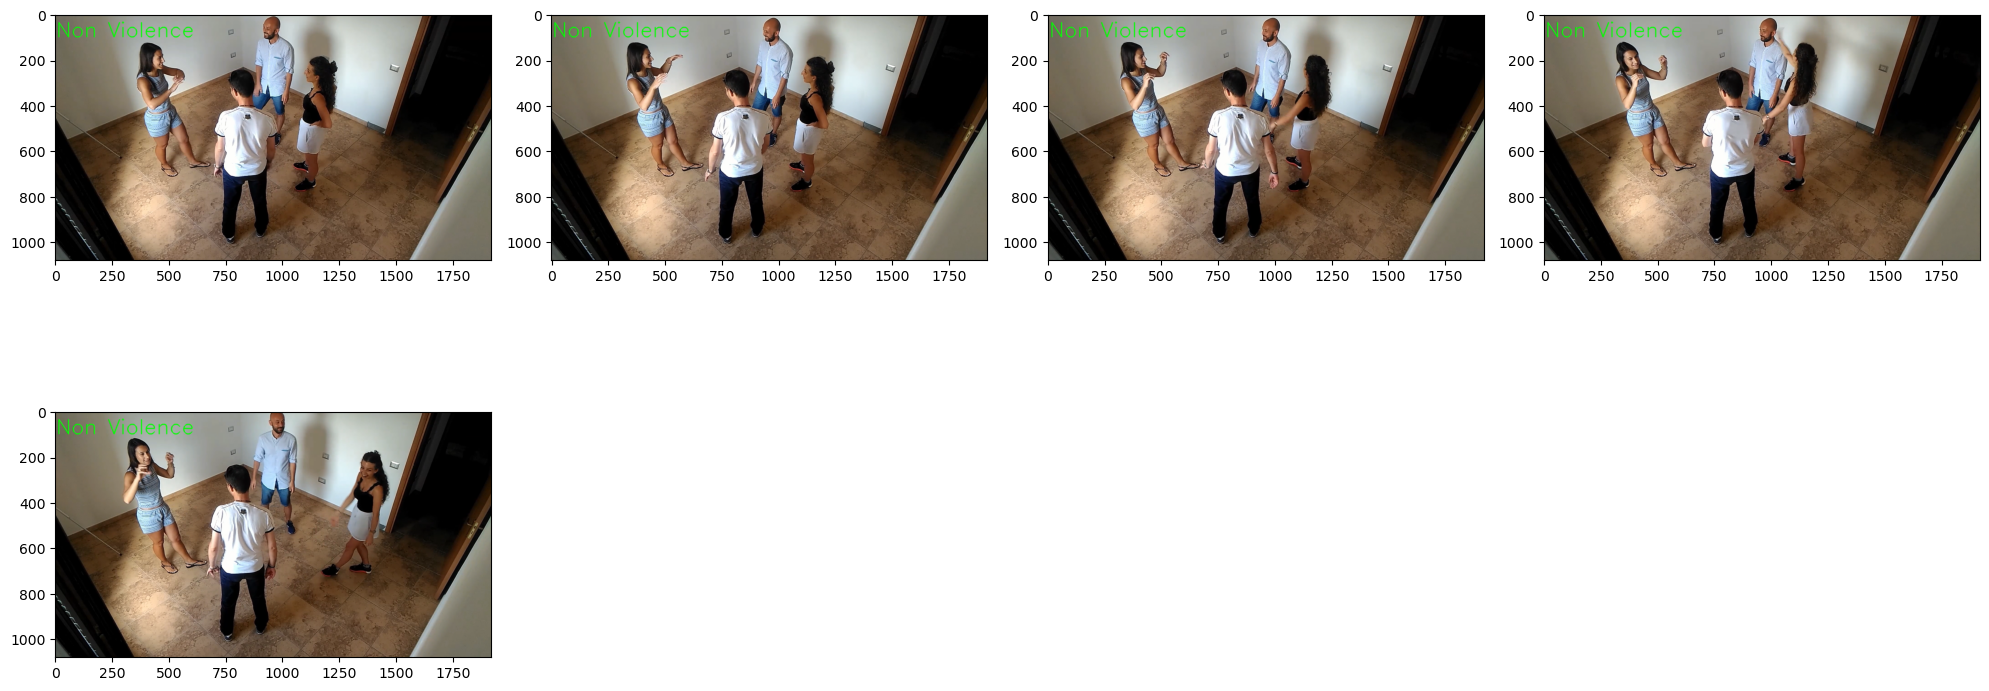

In [30]:
# Show random frames from the output video
show_pred_frames(output_video_file_path)